# 導入不同策略 根據最新300根k棒產生的買賣序列 進行回測 畫出圖表


=== 策略：tvl_sma ===


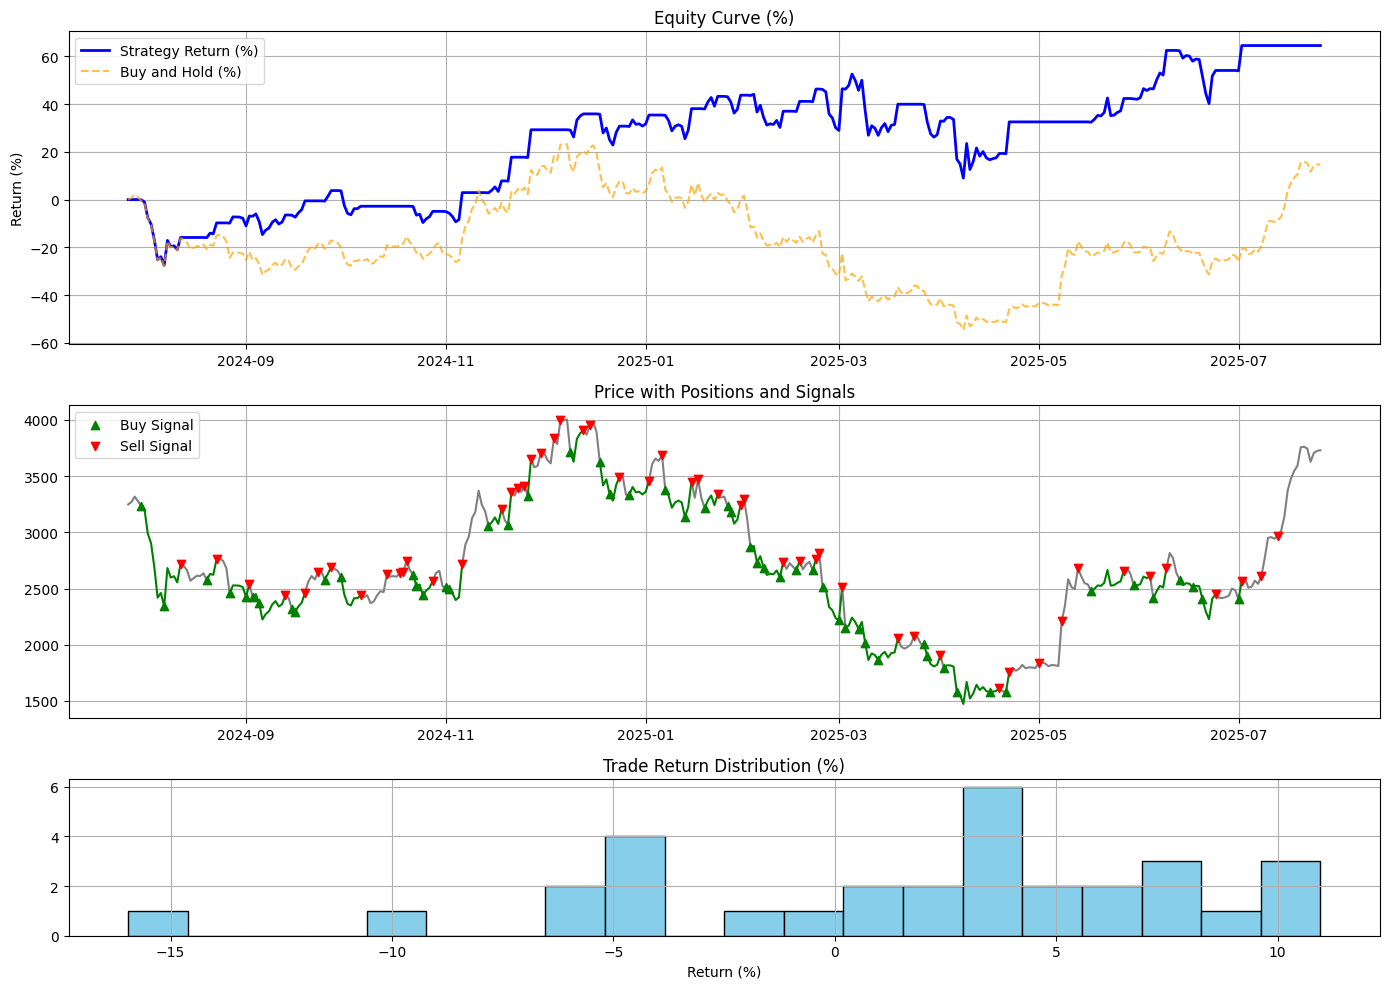

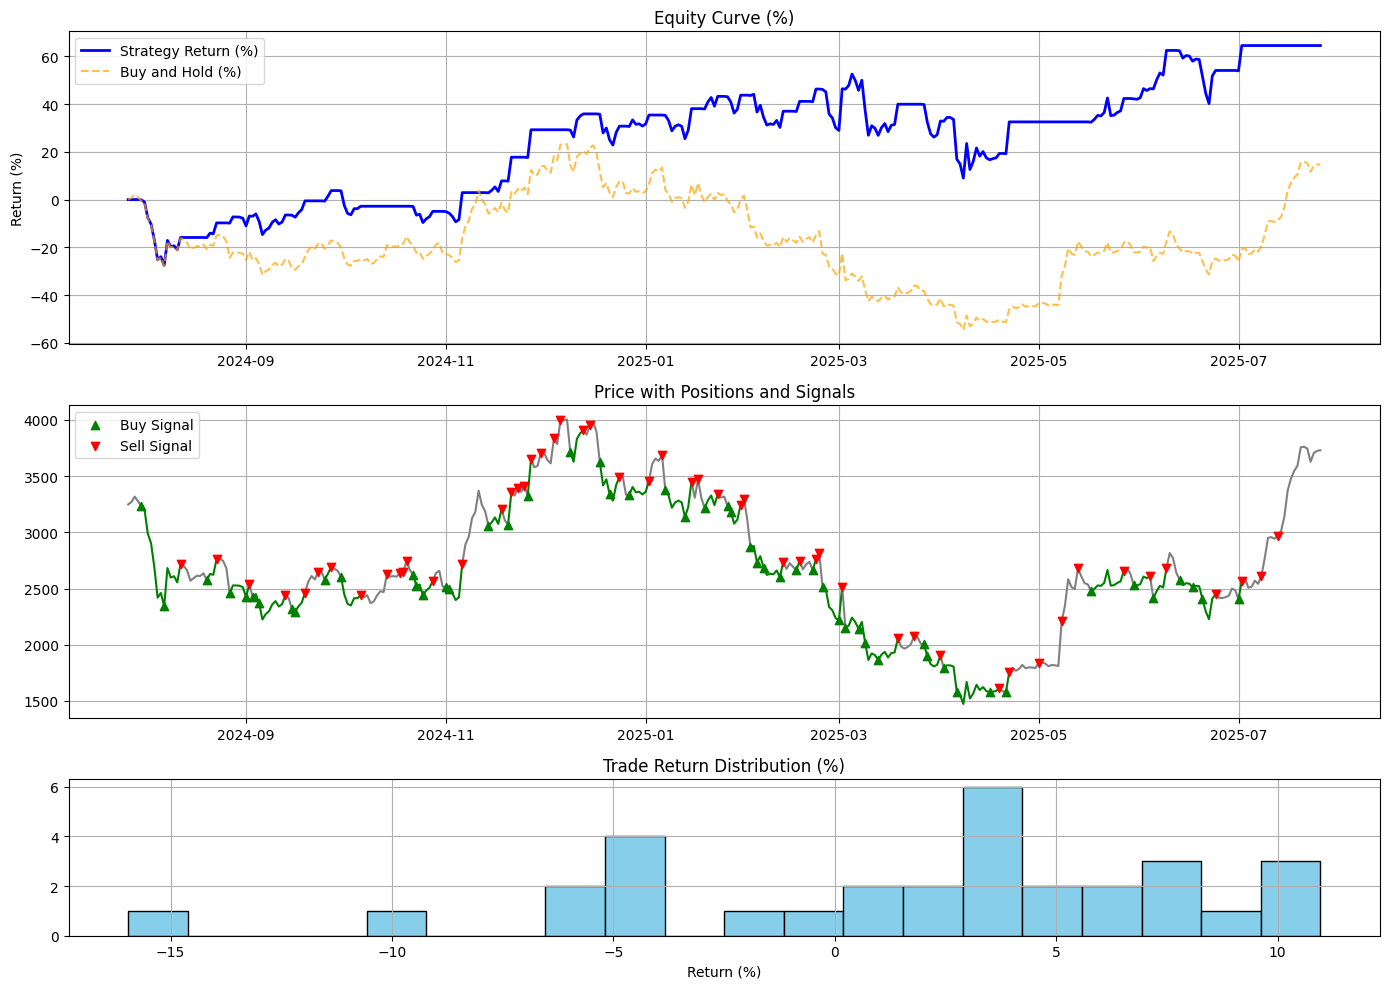

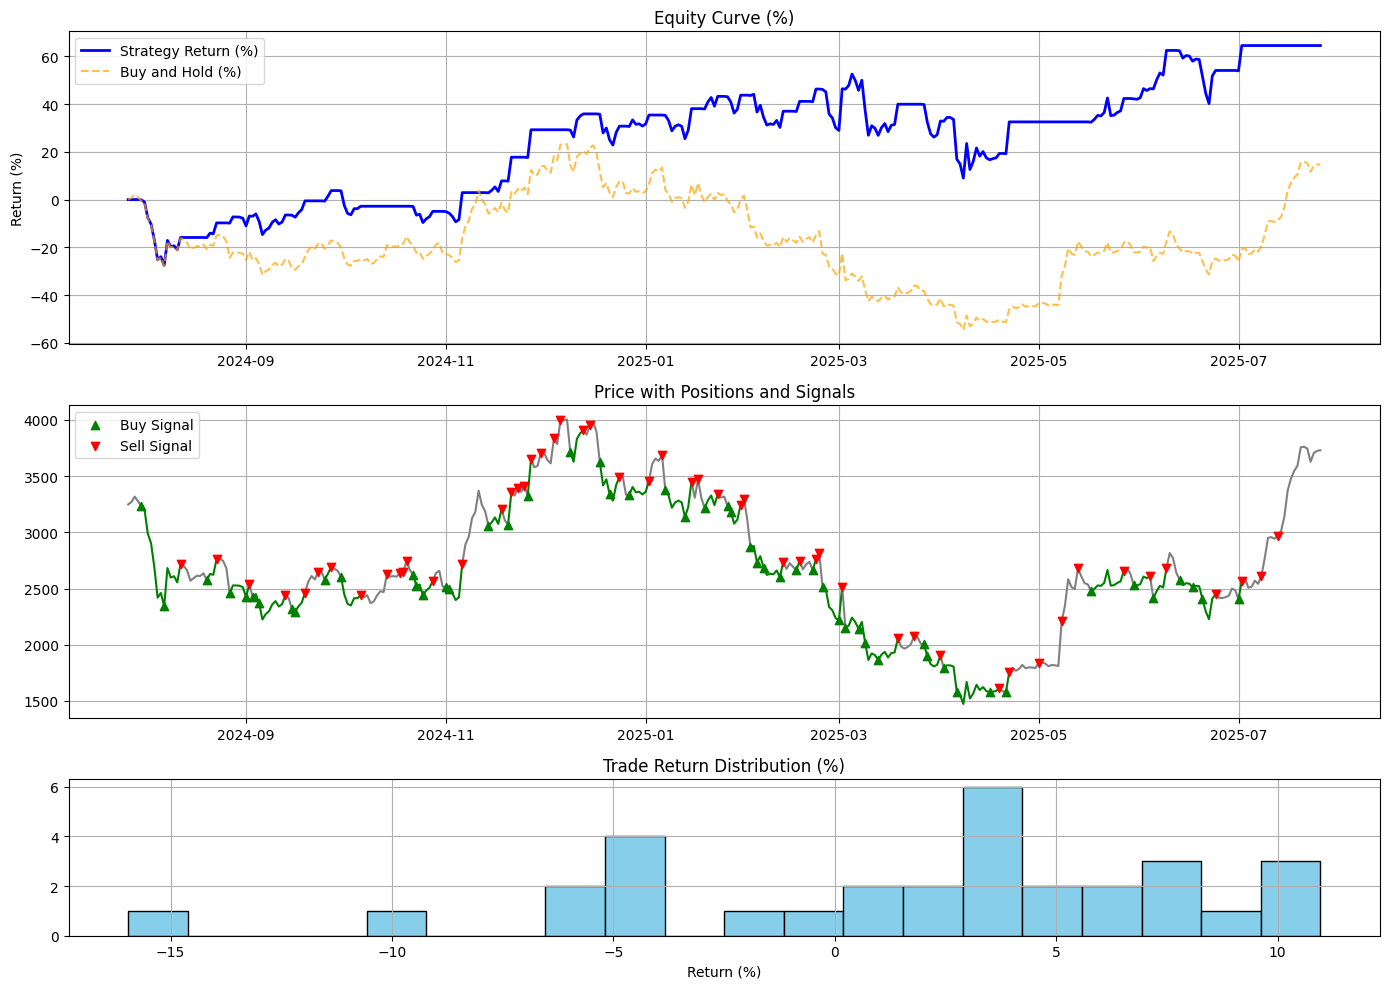

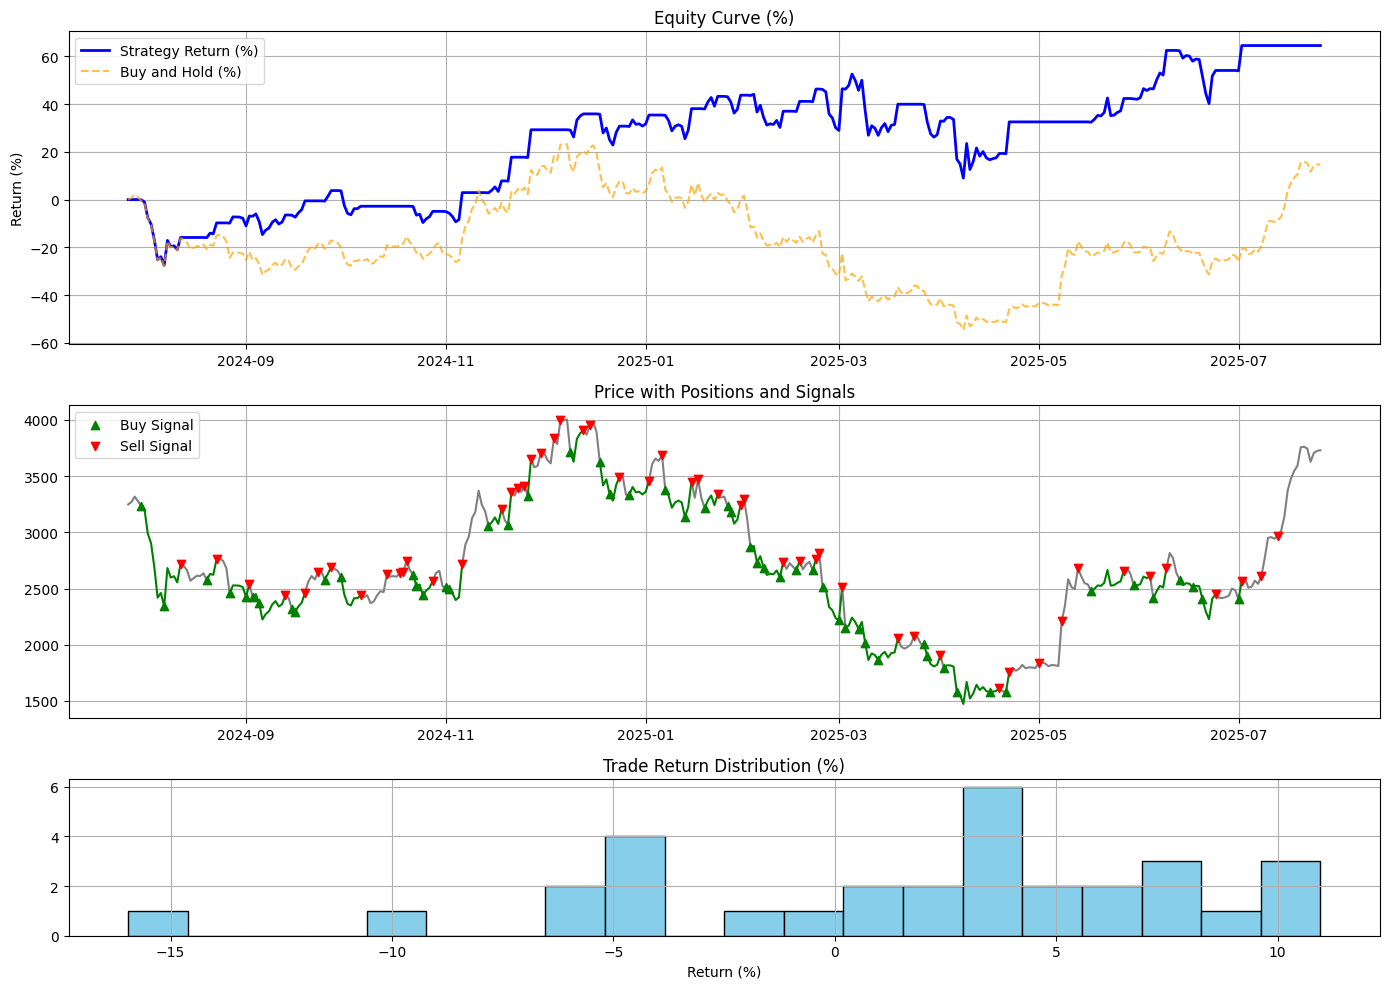

In [1]:
import Technicalindicatorstrategy
from datetime import datetime
from Backtest.backtest import backtest_signals
from Plot.plot import plot_backtest_result
import warnings 
warnings.filterwarnings('ignore')

strategies = [
    "adx","tvl_sma", "boll", "cci", "ema", "kd",
    "macd", "momentum", "rsi", "sma",
    "smartmoney", "williams"
]
strategies = ["tvl_sma"]

for strat_name in strategies[:3]:
    print(f"\n=== 策略：{strat_name} ===")
    strat_module = getattr(Technicalindicatorstrategy, strat_name)

    for lookback in [100,300,1000,2000]:
    
        # 假設每個模組都有 get_signals 函式
        df_signals = strat_module.get_signals("ETHUSDT", "1d", 
                                              datetime.now(), 
                                              limit=365, 
                                              protocol="ethereum", 
                                              window=5)
        
        # 回測
        result = backtest_signals(df_signals, 
                                initial_capital=100, 
                                fee_rate=0.001, 
                                leverage=1, 
                                allow_short=False)
        
        # 繪圖
        plot_backtest_result(result)
